## Práctica Tema 13 - Procesos aleatorios

### Problema 4

Un proceso estocástico está definido por:

$$X(t) = C cos(\Omega t+\Theta)$$

donde $C$ es una variable aleatoria gaussiana de media 5 y varianza 0.2, $\Omega$ es una variable aleatoria distribuida uniformemente en el intervalo $[2\pi (59,1), 2\pi (60,1)]$, y Θ es una variable aleatoria distribuida uniformemente en el intervalo $[0, \frac{\pi}{2}]$. Las tres variables aleatorias son estadísticamente independientes entre sí.

a) Suponga que $\Omega$ no es una variable aleatoria, sino una constante $\omega$. Encuentre $E[X(t)]$ a partir de:

$$X(t) = C cos(\omega t+\Theta)$$

#### Solución

El valor esperado se obtiene como

$$E[X(t)] = \frac{10}{\pi}[cos(\omega t)-sin(\omega t)]$$

Para resolverlo en Python, se definen las variables aleatorias. Luego se realiza el proceso aleatorio N veces. En este caso se toma N = 10. Posteriormente se obtiene la gráfica del valor esperado con la ecuación que se presentó anteriormente, y se incluye en una misma figura que la del proceso aleatorio.

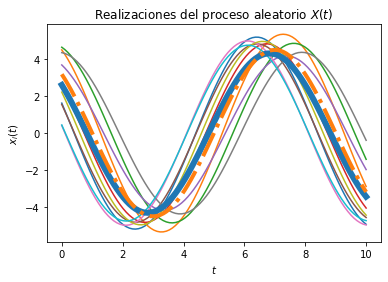

In [3]:
# Los parámetros T, t_final y N son elegidos arbitrariamente

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Variables aleatorias A y Z
vaA = stats.norm(5, np.sqrt(0.2))
vaZ = stats.uniform(0, np.pi/2)

# Constante omega
w = np.pi/4

# Creación del vector de tiempo
T = 100			# número de elementos
t_final = 10	# tiempo en segundos
t = np.linspace(0, t_final, T)

# Inicialización del proceso aleatorio X(t) con N realizaciones
N = 10
X_t = np.empty((N, len(t)))	# N funciones del tiempo x(t) con T puntos

# Creación de las muestras del proceso x(t) (A y Z independientes)
for i in range(N):
	A = vaA.rvs()
	Z = vaZ.rvs()
	x_t = A * np.cos(w*t + Z)
	X_t[i,:] = x_t
	plt.plot(t, x_t)

# Promedio de las N realizaciones en cada instante (cada punto en t)
P = [np.mean(X_t[:,i]) for i in range(len(t))]
plt.plot(t, P, lw=6)

# Graficar el resultado teórico del valor esperado
E = 10/np.pi * (np.cos(w*t) - np.sin(w*t))
plt.plot(t, E, '-.', lw=4)

# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $X(t)$')
plt.xlabel('$t$')
plt.ylabel('$x_i(t)$')
plt.show()


b) Suponga que $\Omega$ y $\Theta$ ahora son constantes, no variables aleatorias, de modo que

$$X(t) = C cos(\omega t+\theta)$$

Encuentre $R_{XX}(t,t+\tau)$.

#### Solución

Al asumir los valores constantes se obtiene que $R_{XX}(t,t+\tau)$ es

$$R_{XX}(t,t+\tau) = 25.2 cos(\omega t+\theta)cos(\omega(t+\tau)+\theta)$$

Se definen las variables aleatorias y se realiza el proceso aleatorio N veces. Luego se obtiene las correlación para cada valor teórico, y $R_{XX}(t,t+\tau)$ según se indicó anteriormente.

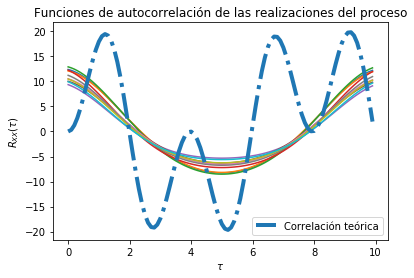

In [2]:
# Constante theta
theta = np.pi/2

# T valores de desplazamiento tau
desplazamiento = np.arange(T)
taus = desplazamiento/t_final

# Inicialización de matriz de valores de correlación para las N funciones
corr = np.empty((N, len(desplazamiento)))

# Nueva figura para la autocorrelación
plt.figure()

# Cálculo de correlación para cada valor de tau
for n in range(N):
	for i, tau in enumerate(desplazamiento):
		corr[n, i] = np.correlate(X_t[n,:], np.roll(X_t[n,:], tau))/T
	plt.plot(taus, corr[n,:])

# Valor teórico de correlación
Rxx = 25.2 * np.cos(w*t+theta)*np.cos(w*(t+taus)+theta)

# Gráficas de correlación para cada realización y la
plt.plot(taus, Rxx, '-.', lw=4, label='Correlación teórica')
plt.title('Funciones de autocorrelación de las realizaciones del proceso')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{XX}(\tau)$')
plt.legend()
plt.show()